[0.2187925237817464, 0.2090062613642455, 0.20887489123069614]
[0.7209918018650859, 0.7188717981563539, 0.7156024750985626]


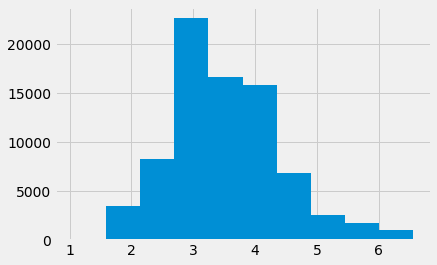

In [48]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
data = pd.read_csv('/Users/vaibhavswami/Downloads/NEU-2019-Social-demo-targeting/cpm_estimates-25Jan19.csv')
data['year']=pd.DatetimeIndex(data['date']).year
data['month']=pd.DatetimeIndex(data['date']).month
data['dayofweek']=pd.DatetimeIndex(data['date']).dayofweek
data['qtr']=pd.DatetimeIndex(data['date']).quarter
data['weekdayname']=pd.DatetimeIndex(data['date']).weekday_name
data['day']=pd.DatetimeIndex(data['date']).day
data.head()
# removing the outliers
std_dev=3
data = data[(np.abs(stats.zscore(data['cpm'])) < float(std_dev))]



res = data[['age_min']]
X=res

y = pd.DataFrame(data['cpm'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)


res = data[['age_min','age_max','year','month','dayofweek','qtr','weekdayname','female','male','day']]
# Binarize the categorical variables
X=pd.get_dummies(res, columns=["age_min","age_max","year","month","dayofweek","qtr","weekdayname","female","male"],drop_first=True)
X.head()

# drop_first = True removes multi-collinearity

data["cpm"].hist()


y = pd.DataFrame(data['cpm'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 scores.append(model.score(X.iloc[test,:], y.iloc[test,:]))
print(scores)


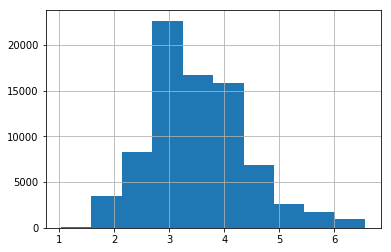

In [2]:
data["cpm"].hist()

In [51]:
# Binarize the categorical variables
X=pd.get_dummies(res, columns=["age_min","age_max","year","month","dayofweek","qtr","weekdayname","female","male"],drop_first=True)
X.head(10)

,day,age_min_18,age_min_25,age_min_34,age_min_35,age_min_44,age_min_45,age_max_24,age_max_34,age_max_44,...,qtr_3,qtr_4,weekdayname_Monday,weekdayname_Saturday,weekdayname_Sunday,weekdayname_Thursday,weekdayname_Tuesday,weekdayname_Wednesday,female_1,male_1
0,2,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1,2,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,2,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,1
3,2,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
4,2,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
5,2,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,1
6,2,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
7,2,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
8,2,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
9,2,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [55]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 42)

In [56]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (63316, 40)
Training Labels Shape: (63316,)
Testing Features Shape: (15829, 40)
Testing Labels Shape: (15829,)


In [57]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [58]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.01 degrees.


In [59]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.77 %.


In [54]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(data['cpm'])
# Remove the labels from the features
# axis 1 refers to the columns
#features= data.drop('cpm', axis = 1)
# Saving feature names for later use
feature_list = list(X.columns)
# Convert to numpy array
features = np.array(X)

In [40]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

FileNotFoundError: [Errno 2] "dot" not found in path.

In [60]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: year_2019            Importance: 0.2
Variable: age_min_18           Importance: 0.17
Variable: qtr_4                Importance: 0.15
Variable: day                  Importance: 0.11
Variable: month_6              Importance: 0.05
Variable: male_1               Importance: 0.05
Variable: age_max_34           Importance: 0.03
Variable: month_7              Importance: 0.03
Variable: age_min_25           Importance: 0.02
Variable: age_max_24           Importance: 0.02
Variable: month_5              Importance: 0.02
Variable: month_11             Importance: 0.02
Variable: female_1             Importance: 0.02
Variable: age_min_35           Importance: 0.01
Variable: age_min_45           Importance: 0.01
Variable: age_max_44           Importance: 0.01
Variable: age_max_54           Importance: 0.01
Variable: age_max_65+          Importance: 0.01
Variable: month_4              Importance: 0.01
Variable: month_8              Importance: 0.01
Variable: month_9              Importance

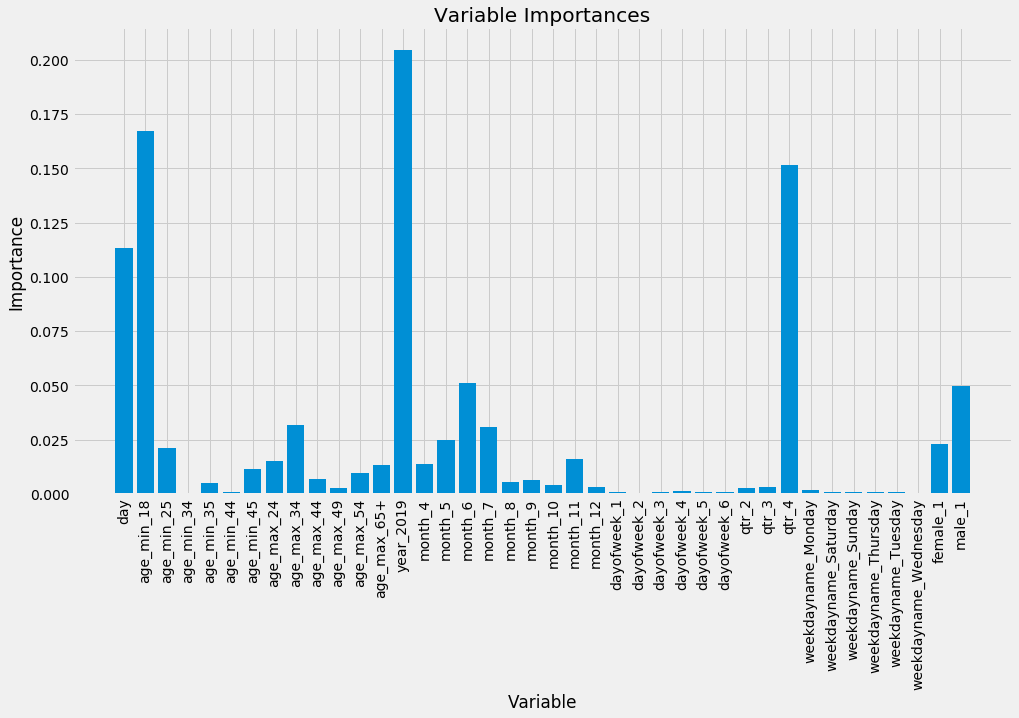

In [70]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(15,8))
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');